In [3]:
import torch

In [2]:
!pip install mmh3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 6.9 MB/s eta 0:00:00


# Recommendation
- We use ML models to determine a user's preference based on the user's past history
- We have documents (the entities we want to recommend), queries (the information we need to make recommendations) and embeddings (some vector space)
- Common architecutre for a recommendation system:
    - 1. Candidate generation - we 
    - 2. Scoring - we rank the candidates in order to select a set of documents 
    - 3. Reranking
- Retrieval and Ranking
    - Generate a large list of plausible item candidates
    - Combine retrieved items into a list, remove duplicates, items already watched/purchased

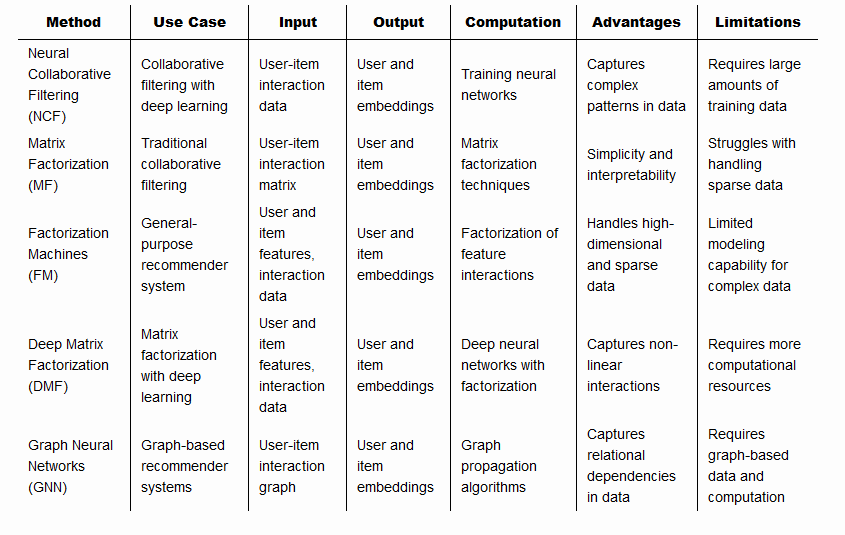

## Embeddings:
- We use embeddings as a way to represent user and iterms that capture latent characteristics
- We use embeddings for the following reasons:
    - it acts as a way to reduce dimensionality VS using one hot encoded vectors
    - it makes the model learn useful and dense representations of the IDs during training, these embeddings capture 
- Usage:
    - We create an embedding matrix $V \times D$, where $V$ is number of unique IDs, $D$ is the embedding dimension
    - we use the ID as an index to look up its corresponding embedding vector from the embedding matrix
    - we train the embeddings with backprop, and we update the embeddings with a loss function

In [21]:
class Recommender(torch.nn.Module):
    def __init__(self,num_of_users,num_of_items,embedding_dim):
        super().__init__()
        self.user_embed = torch.nn.Embedding(num_of_users,embedding_dim)
        self.item_embed = torch.nn.Embedding(num_of_items,embedding_dim)
    def forward(self,user_id,item_id):
        user_embeddings = self.user_embed(user_id)
        item_embeddings = self.item_embed(item_id)
        return (user_embeddings * item_embeddings).sum(1)
    

# Running inference on the system
users = torch.tensor([1])
items = torch.tensor([10])

# The number of users and items we have
num_users= 1000000
num_items = 1000000
model = Recommender(num_users,num_items,embedding_dim=128)
output = model(users,items)
print(output)
                                       

In [23]:
output

tensor([-7.4617, -0.0910,  2.9316, -4.6286,  6.9647], grad_fn=<SumBackward1>)

### Hashing
- A method to convert high-dimensional cateogorical data into low dimensional vectors by using a hash function
- useful for when you have a lot of IDs
- you map large number of IDs to a smaller number of buckets

In [ ]:
# Modulo Hashing: just using the mod operation to assign ids to a bucket
class HasingRecommender(torch.nn.Module):
    def __init__(self,num_of_user_buckets,num_of_item_buckets,embedding_dim):
        super().__init__()
        self.num_of_user_buckets = num_of_user_buckets
        self.num_of_item_buckets = num_of_item_buckets
        self.user_embed = torch.nn.Embedding(num_of_user_buckets,embedding_dim)
        self.item_embed = torch.nn.Embedding(num_of_item_buckets,embedding_dim)
    def forward(self,user_id,item_id):
        user_embeddings = self.user_embed(user_id % self.num_of_user_buckets)
        item_embeddings = self.item_embed(item_id % self.num_of_item_buckets)
        return (user_embeddings * item_embeddings).sum(1)

# MurmurHash: uses a non-cryptographic hash function for its speed and distributoin properties
class HasingRecommender(torch.nn.Module):
    def __init__(self,num_of_user_buckets,num_of_item_buckets,embedding_dim):
        super().__init__()
        self.num_of_user_buckets = num_of_user_buckets
        self.num_of_item_buckets = num_of_item_buckets
        self.user_embed = torch.nn.Embedding(num_of_user_buckets,embedding_dim)
        self.item_embed = torch.nn.Embedding(num_of_item_buckets,embedding_dim)
    def forward(self,user_id,item_id):
        hashed_user_ids = torch.LongTensor([mmh3.hash(str(id.item())) % self.num_of_user_buckets for id in user_id])
        hashed_item_ids = torch.LongTensor([mmh3.hash(str(id.item())) % self.num_of_item_buckets for id in item_id])
        user_embeddings = self.user_embed(hashed_user_ids) # self.user_embed.mean(dim=0) you can average to deal with collision
        item_embeddings = self.item_embed(hashed_item_ids)
        
        return (user_embeddings * item_embeddings).sum(1)
       

# Running inference on the system
users = torch.tensor([1,2,3,4,5])
items = torch.tensor([10,20,30,40,50])

# The number of users and items we have
num_users= 1000000
num_items = 1000000
model = Recommender(num_users,num_items,embedding_dim=128)
output = model(users,items)
                                       

### Matrix Factorization